In [1]:
import pandas as pd
import matplotlib.pyplot as plt


import matplotlib
print(matplotlib.__version__)



3.4.3


In [2]:
#Read in data and format labels
df = pd.read_csv("../data/exT.csv")
df = df.rename(columns={'Unnamed: 0':'labels'})
df['labels'] = df['labels'].apply(lambda x: x.split(".")[0])

#labels that will be eliminated due to insufficient quantitities.
elimlabels = ['Pelvis', 'Nervous', 'Fallopian', 'Mediastinum', 'Bile', 'Ocular', 'Pleura', 'Bone', 'Thymus', 'Rectum', 'none']

#Number of rows
length = df.shape[0]

#Eliminating rows
elimlist = list()
for l in elimlabels:
    print("Eliminating ", l)
    for i in range(length):
        if df['labels'].values[i] == l:
            elimlist.append(i)
print("Rows to be eliminated:", elimlist)
df.drop(elimlist, inplace=True)
print("Resulting dataframe:")
print(df)
df.reset_index(drop = True, inplace=True)

Y = df.pop('labels')

Eliminating  Pelvis
Eliminating  Nervous
Eliminating  Fallopian
Eliminating  Mediastinum
Eliminating  Bile
Eliminating  Ocular
Eliminating  Pleura
Eliminating  Bone
Eliminating  Thymus
Eliminating  Rectum
Eliminating  none
Rows to be eliminated: [1227, 1228, 3134, 7912, 7913, 387, 388, 389, 2327, 9826, 10983, 11477, 13187, 15846, 393, 467, 888, 989, 1616, 1885, 1953, 2245, 2579, 3596, 4886, 6073, 6935, 7441, 8095, 8157, 8257, 8676, 9386, 10525, 12365, 337, 1200, 1350, 1485, 1946, 2206, 2800, 2814, 2971, 3790, 4639, 4765, 5440, 6359, 6504, 7345, 7685, 8475, 8995, 10345, 10792, 10814, 10919, 11482, 11604, 11666, 12712, 12786, 13015, 13062, 13101, 13500, 13739, 14816, 15359, 15798, 447, 1494, 1793, 2015, 2016, 2031, 2137, 2807, 2808, 3163, 3479, 3772, 3773, 4107, 4507, 4563, 5087, 5809, 5985, 6881, 6882, 7005, 7485, 8524, 9331, 9813, 10670, 10671, 10874, 10875, 11080, 11109, 11294, 11295, 11689, 12675, 13708, 14388, 14389, 15139, 15248, 15249, 15871, 91, 116, 173, 1358, 1624, 1787, 1841, 

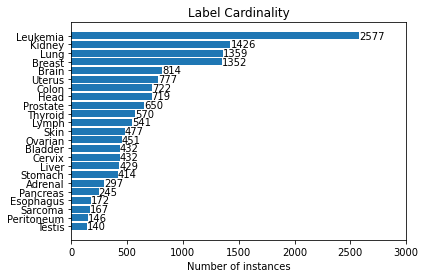

In [15]:
#ax = Y.value_counts().plot(kind='barh', figsize = (10,6), title="Label Cardinalities")

#ax = Y.value_counts().plot.barh()

labels = Y.value_counts().index.tolist()
counts = Y.value_counts().tolist()

#ax.bar_label(ax.containers[0])

fig, ax = plt.subplots()

hbars = ax.barh(labels, counts, align='center')
ax.set_yticks(labels)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of instances')
ax.set_title('Label Cardinality')
plt.xlim(0, 3000)

# Label with specially formatted floats
ax.bar_label(hbars)
#ax.set_xlim(right=15)  # adjust xlim to fit labels

plt.show()